In [1]:
#To Import the data stored in the local drive
import pandas as pd
data=pd.read_excel("C:/Users/waghs/Desktop/DATTTTA.xlsx")

In [13]:
#For viewing the first 5 observation of the data
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
# Making the data ready for analysis using validation set approach
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X1 = data.iloc[:, :12]  # First 12 columns as features
y = data.iloc[:, 12]   # Last column as target variable

# Identify numerical and categorical features
numerical_features = ["age", "creatinine_phosphokinase", "ejection_fraction", 
                      "platelets", "serum_creatinine", "serum_sodium", "time"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

# Split data into features and target variable
X = X1[numerical_features + categorical_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

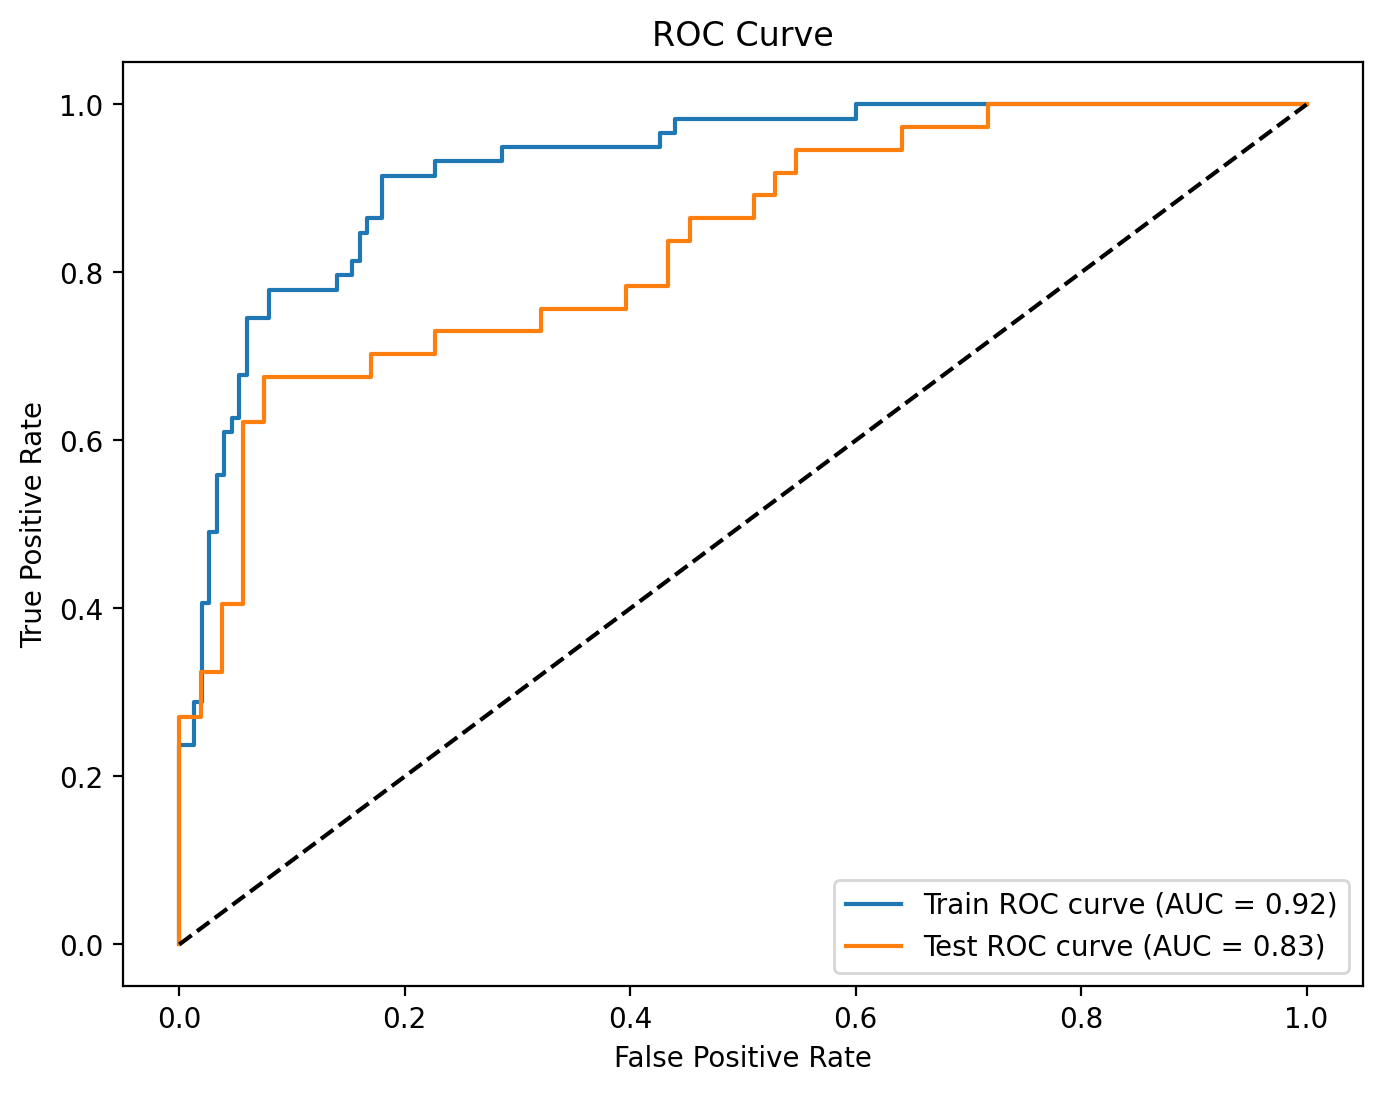

Training Set Metrics:
Accuracy: 0.8803827751196173
Precision: 0.8148148148148148
Recall: 0.7457627118644068
F1-Score: 0.7787610619469026
ROC AUC Score: 0.924180790960452

Testing Set Metrics:
Accuracy: 0.7888888888888889
Precision: 0.875
Recall: 0.5675675675675675
F1-Score: 0.6885245901639344
ROC AUC Score: 0.8342682304946456


In [3]:
#logistic without cross validation
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

#Create dummy variables for categorical features(if needed)
#X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
#X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate ROC AUC score
train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6),dpi=200)
plt.plot(fpr_train, tpr_train, label='Train ROC curve (AUC = {:.2f})'.format(train_roc_auc))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (AUC = {:.2f})'.format(test_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('ROC Curve for Log Reg', dpi=200)
plt.show()


# Print evaluation metrics
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)
print("ROC AUC Score:", train_roc_auc)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)
print("ROC AUC Score:", test_roc_auc)

In [4]:
### Make predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc_roc = roc_auc_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc_roc = roc_auc_score(y_test, y_test_pred)

# Print the results
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)
print("AUC-ROC:", train_auc_roc)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)
print("AUC-ROC:", test_auc_roc)

cm_training = confusion_matrix(y_train_pred, y_train)
print(cm_training)
cm_test = confusion_matrix(y_test_pred,y_test)
print(cm_test)

Training Set Metrics:
Accuracy: 0.8803827751196173
Precision: 0.8148148148148148
Recall: 0.7457627118644068
F1-Score: 0.7787610619469026
AUC-ROC: 0.8395480225988701

Testing Set Metrics:
Accuracy: 0.7888888888888889
Precision: 0.875
Recall: 0.5675675675675675
F1-Score: 0.6885245901639344
AUC-ROC: 0.755481896991331
[[140  15]
 [ 10  44]]
[[50 16]
 [ 3 21]]


In [28]:
#To check significance of coefficients
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

X_train_sm = sm.add_constant(X_train)
log_reg = sm.Logit(y_train, X_train_sm).fit()

#To Access coefficients and p-values
coefs = log_reg.params[1:]  # Exclude the intercept
p_values = log_reg.pvalues[1:]

Significance_check = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefs, 'p-value': p_values.round(4)})
print(Significance_check)

Optimization terminated successfully.
         Current function value: 0.309325
         Iterations 8
                                           Feature  Coefficient  p-value
age                                            age     0.739480   0.0029
creatinine_phosphokinase  creatinine_phosphokinase     0.074677   0.7105
ejection_fraction                ejection_fraction    -0.959182   0.0002
platelets                                platelets    -0.222597   0.3217
serum_creatinine                  serum_creatinine     0.866712   0.0001
serum_sodium                          serum_sodium    -0.289820   0.2115
time                                          time    -1.912659   0.0000
anaemia                                    anaemia    -0.388538   0.4366
diabetes                                  diabetes     0.154849   0.7418
high_blood_pressure            high_blood_pressure    -0.273453   0.5660
sex                                            sex    -1.202001   0.0276
smoking               

In [30]:
# To check the assumption of multicollinearity
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Standardize the features (optional but improves stability)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif)

# Check if VIF > 10
high_vif = vif[vif['VIF'] > 10]
if not high_vif.empty:
    print("\nFeatures with high multicollinearity (VIF > 10):")
    print(high_vif)
else:
    print("\nNo multicollinearity detected (VIF < 10 for all features).")

Variance Inflation Factor (VIF):
                     Feature       VIF
0                        age  1.091692
1   creatinine_phosphokinase  1.081721
2          ejection_fraction  1.073822
3                  platelets  1.043022
4           serum_creatinine  1.104530
5               serum_sodium  1.155470
6                       time  1.146624
7                    anaemia  1.095994
8                   diabetes  1.079057
9        high_blood_pressure  1.084431
10                       sex  1.322889
11                   smoking  1.294687

No multicollinearity detected (VIF < 10 for all features).


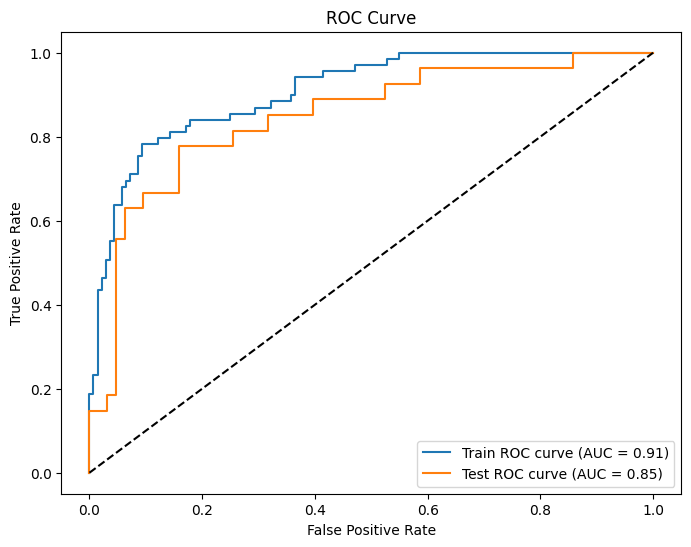

Training Set Metrics:
Accuracy: 0.8516746411483254
Precision: 0.8064516129032258
Recall: 0.7246376811594203
F1-Score: 0.7633587786259542
ROC AUC Score: 0.9078674948240166

Testing Set Metrics:
Accuracy: 0.8333333333333334
Precision: 0.75
Recall: 0.6666666666666666
F1-Score: 0.7058823529411765
ROC AUC Score: 0.8465608465608465
[[128  19]
 [ 12  50]]
[[57  9]
 [ 6 18]]


In [30]:
# Logistic After eliminating the insignificant regressors

numerical_features = ["age", "ejection_fraction", "serum_creatinine", "time"]
categorical_features = ["sex"]

# Split data into features and target variable
X = X1[numerical_features + categorical_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Create dummy variables for categorical features
#X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
#X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate ROC AUC score
train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (AUC = {:.2f})'.format(train_roc_auc))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (AUC = {:.2f})'.format(test_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('ROC Curve for Log Reg - with significant regressors', dpi=200)
plt.show()

# Print evaluation metrics
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)
print("ROC AUC Score:", train_roc_auc)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)
print("ROC AUC Score:", test_roc_auc)


cm_training = confusion_matrix(y_train_pred, y_train)
print(cm_training)
cm_test = confusion_matrix(y_test_pred,y_test)
print(cm_test)

2-Fold CV Accuracy: 0.5223042505592841
3-Fold CV Accuracy: 0.698922558922559
4-Fold CV Accuracy: 0.778918918918919
5-Fold CV Accuracy: 0.7922598870056496
6-Fold CV Accuracy: 0.8089115646258502
7-Fold CV Accuracy: 0.8122923588039868
8-Fold CV Accuracy: 0.8164118065433855
9-Fold CV Accuracy: 0.8165973460091107
10-Fold CV Accuracy: 0.815632183908046
11-Fold CV Accuracy: 0.8168590668590668
12-Fold CV Accuracy: 0.8188888888888889
13-Fold CV Accuracy: 0.822742474916388
14-Fold CV Accuracy: 0.8232838589981446
15-Fold CV Accuracy: 0.822280701754386
16-Fold CV Accuracy: 0.8214546783625731
17-Fold CV Accuracy: 0.8221837754709727
18-Fold CV Accuracy: 0.8186274509803921
19-Fold CV Accuracy: 0.8177631578947367


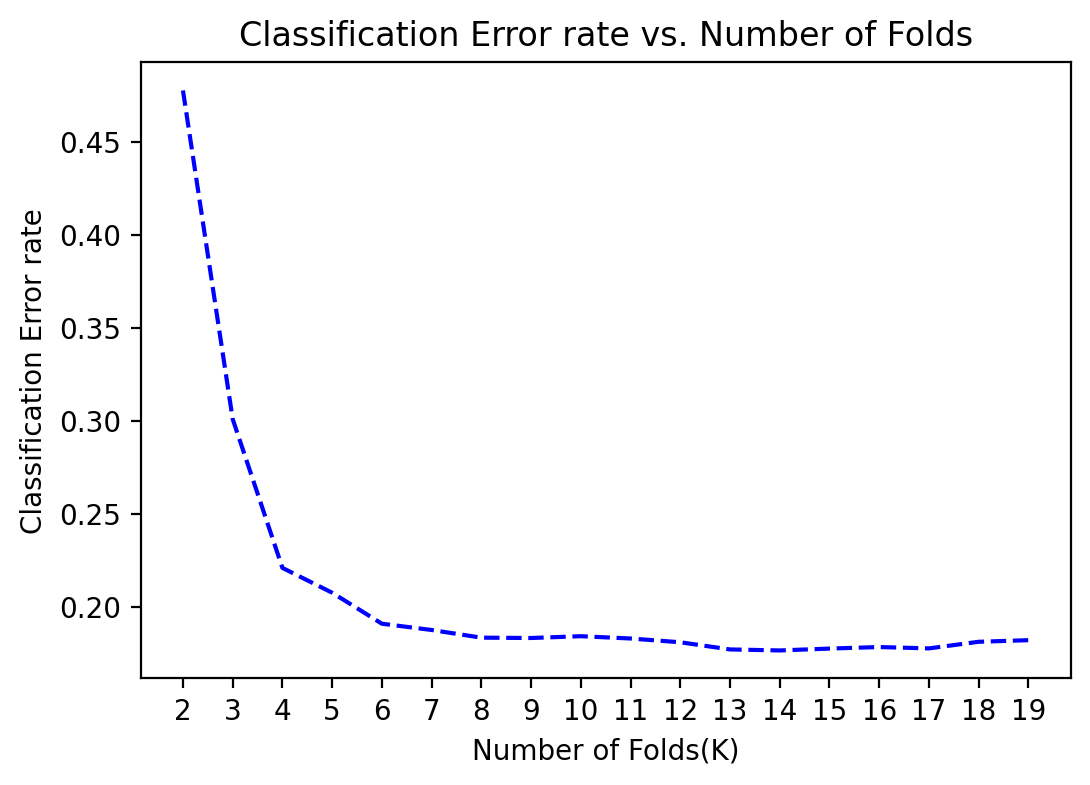

In [34]:
# Logistic Regression with K-Fold Cross Validation
import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#K-Fold Cross validation
for i in range(2, 20):
    model = LogisticRegression()
    scores = cross_val_score(model, X, y, cv=i, scoring='accuracy')
    print(f"{i}-Fold CV Accuracy:", scores.mean())

error_rates = []
for i in range(2, 20):
    model = LogisticRegression()
    scores = cross_val_score(model, X, y, cv=i, scoring='accuracy')
    error_rates.append(1 - scores.mean())  ##error= 1 - accuracy

## Plot the graph
plt.figure(figsize=(6, 4),dpi=200)  # Adjust figure size
plt.plot(range(2, 20), error_rates, linestyle='--', color='blue')
plt.xticks(range(2, 20))  # Set integer x-axis ticks
plt.xlabel("Number of Folds(K)")
plt.ylabel("Classification Error rate")
plt.title("Classification Error rate vs. Number of Folds")
plt.savefig('123', dpi=200)
plt.show()

In [11]:
# Logistic with Leave-One-Out Cross-Validation (LOOCV)
loocv = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=loocv, scoring='accuracy')
print("LOOCV Accuracy:", scores.mean())
print("LOOCV Error rate:",1-scores.mean())

LOOCV Accuracy: 0.8294314381270903
LOOCV Error rate: 0.1705685618729097


Training Set Metrics:
Accuracy: 0.9186602870813397
Precision: 0.875
Recall: 0.8305084745762712
F1-Score: 0.8521739130434782

Testing Set Metrics:
Accuracy: 0.8222222222222222
Precision: 0.8181818181818182
Recall: 0.7297297297297297
F1-Score: 0.7714285714285715


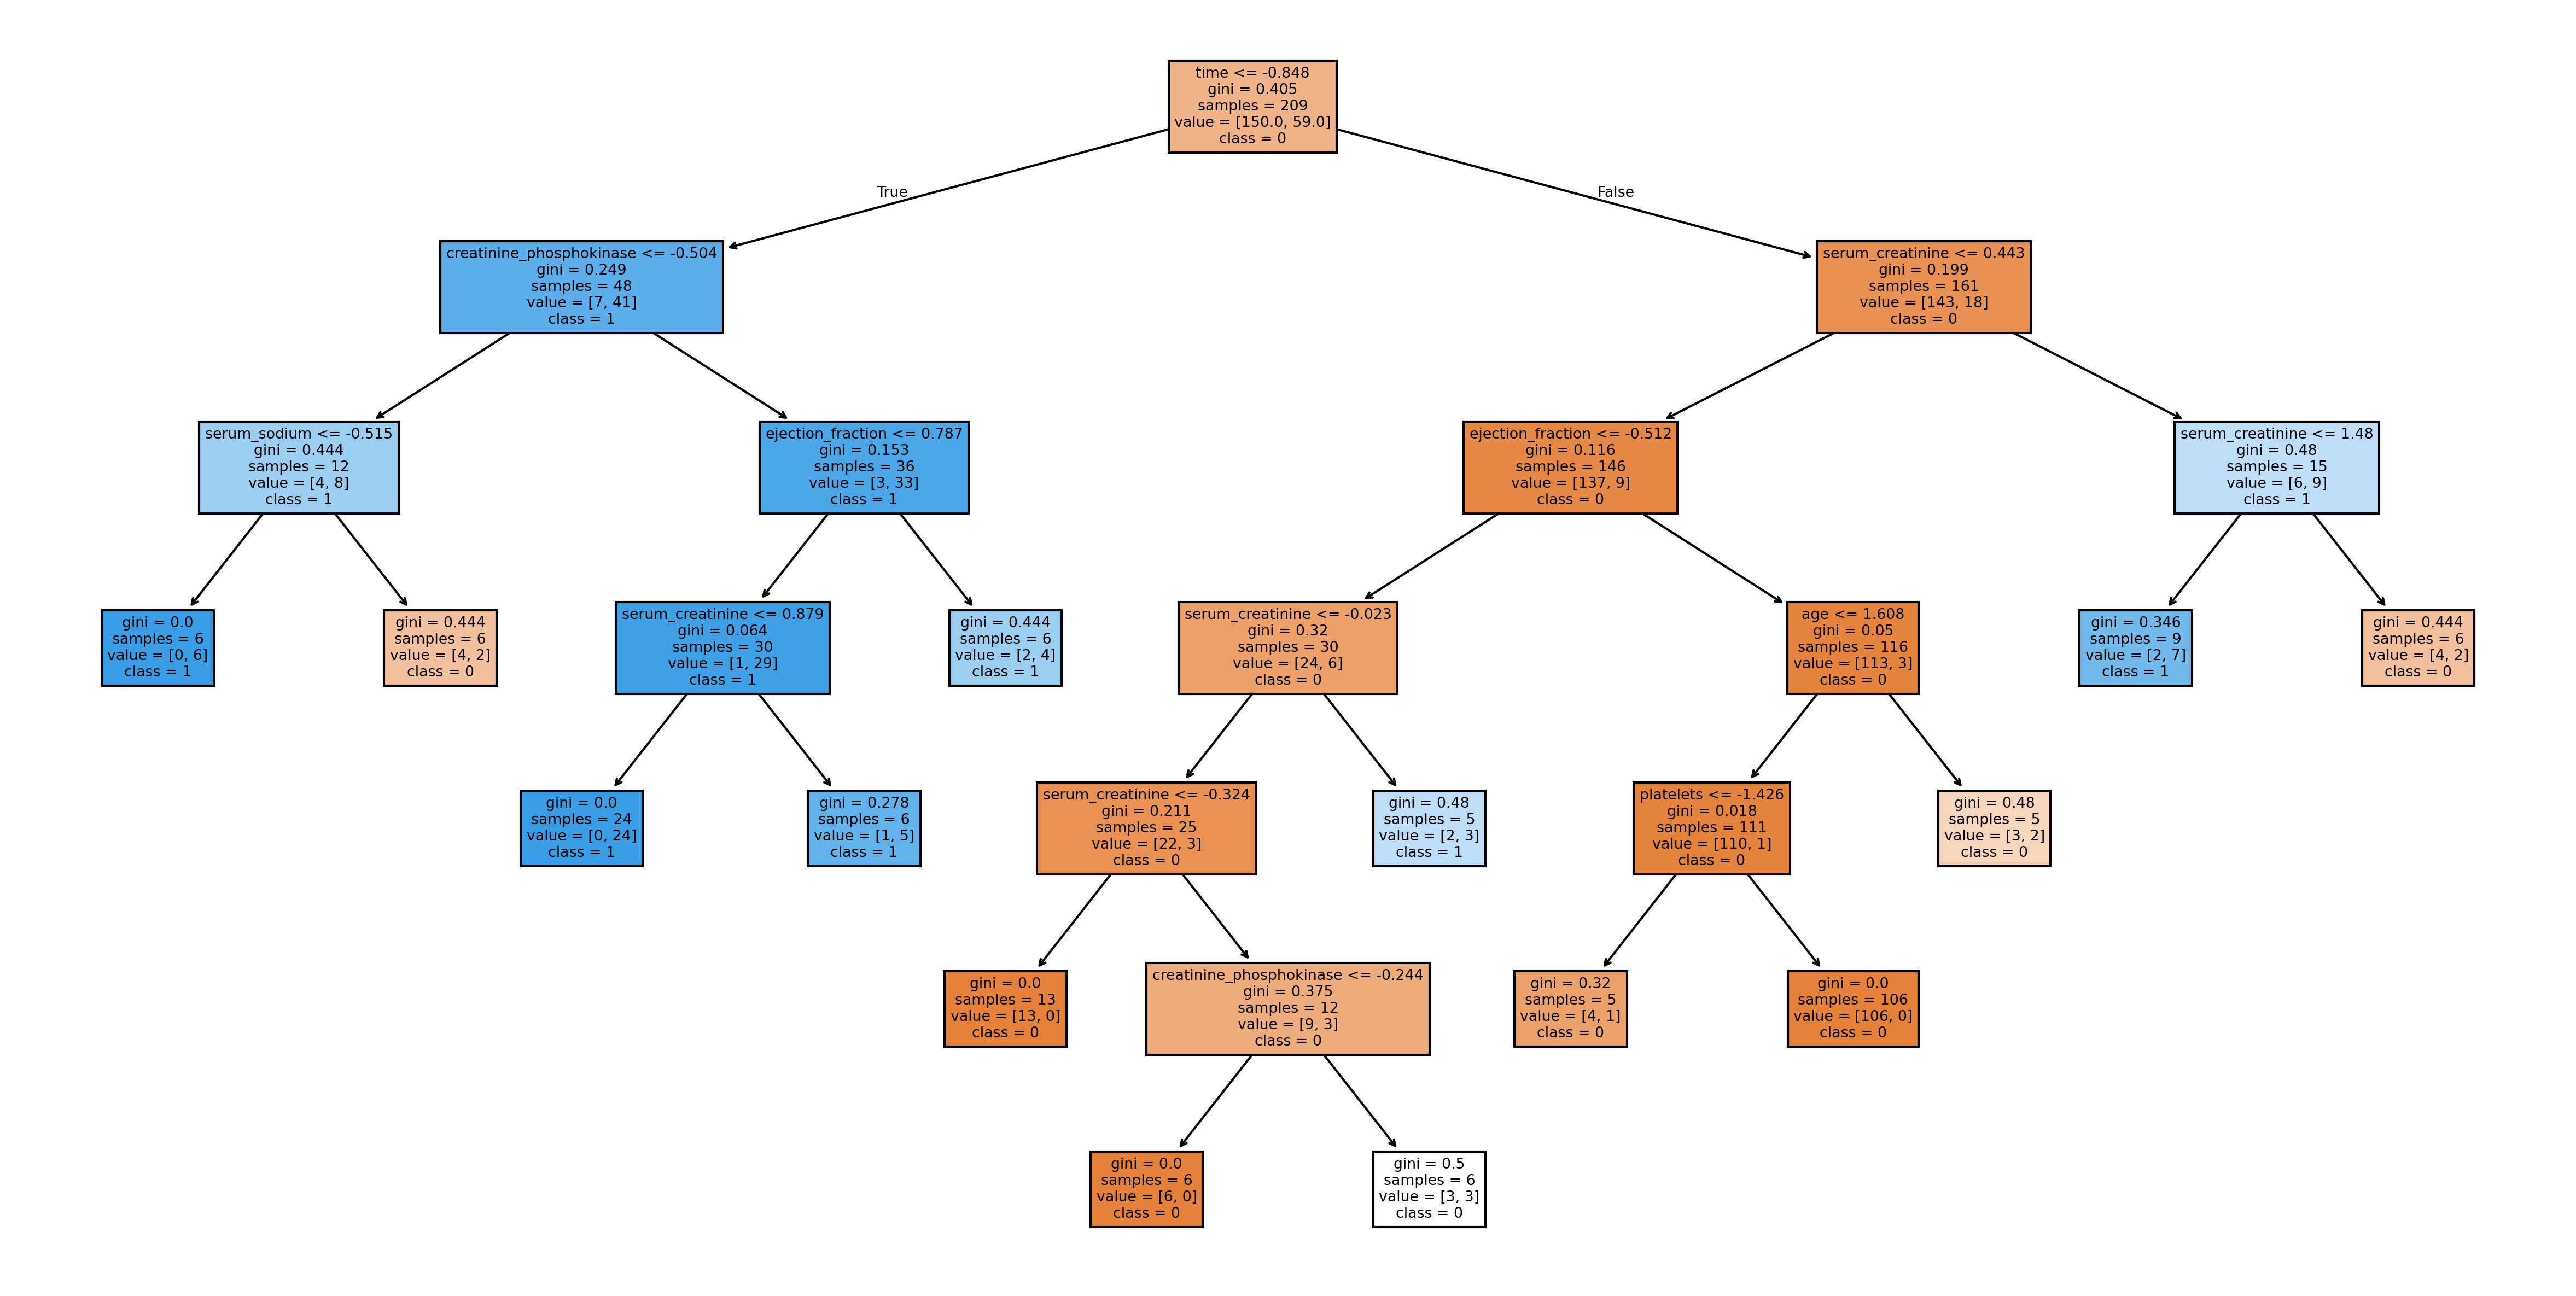

[[143  10]
 [  7  49]]
[[47 10]
 [ 6 27]]
10-Fold CV Accuracy: 0.725632183908046


In [6]:
# Classification using decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Decision Tree classifier object
clf = DecisionTreeClassifier(min_samples_leaf=5)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Evaluate on the training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)

# Evaluate on the testing set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)

plt.figure(figsize=(20, 10), dpi=300)
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.savefig('Decision tree - unpruned', dpi=400)
plt.show()

cm_training = confusion_matrix(y_train_pred, y_train)
print(cm_training)
cm_test = confusion_matrix(y_test_pred,y_test)
print(cm_test)

# K-Fold Cross validation
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print("10-Fold CV Accuracy:", scores.mean())

Optimal alpha Value :  0.013131313131313131


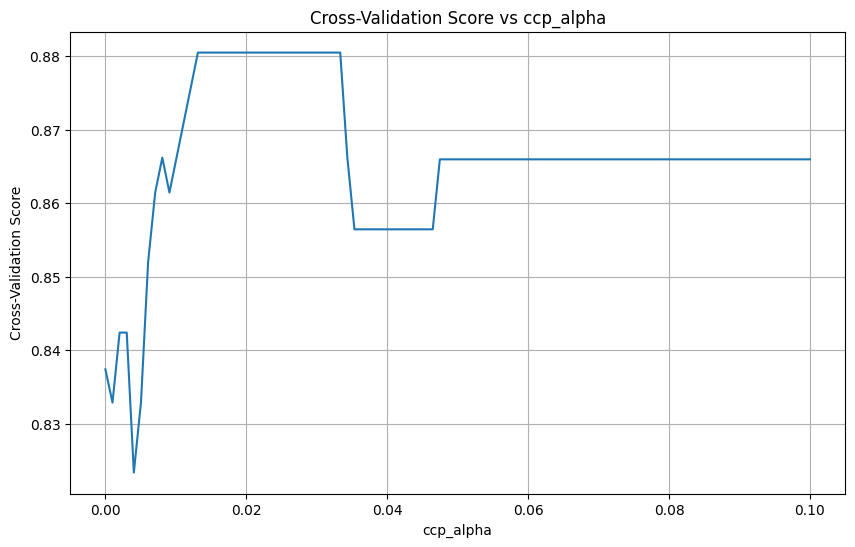

Training Set Metrics:
Accuracy: 0.8947368421052632
Precision: 0.7936507936507936
Recall: 0.847457627118644
F1-Score: 0.819672131147541

Testing Set Metrics:
Accuracy: 0.7444444444444445
Precision: 0.7333333333333333
Recall: 0.5945945945945946
F1-Score: 0.6567164179104478


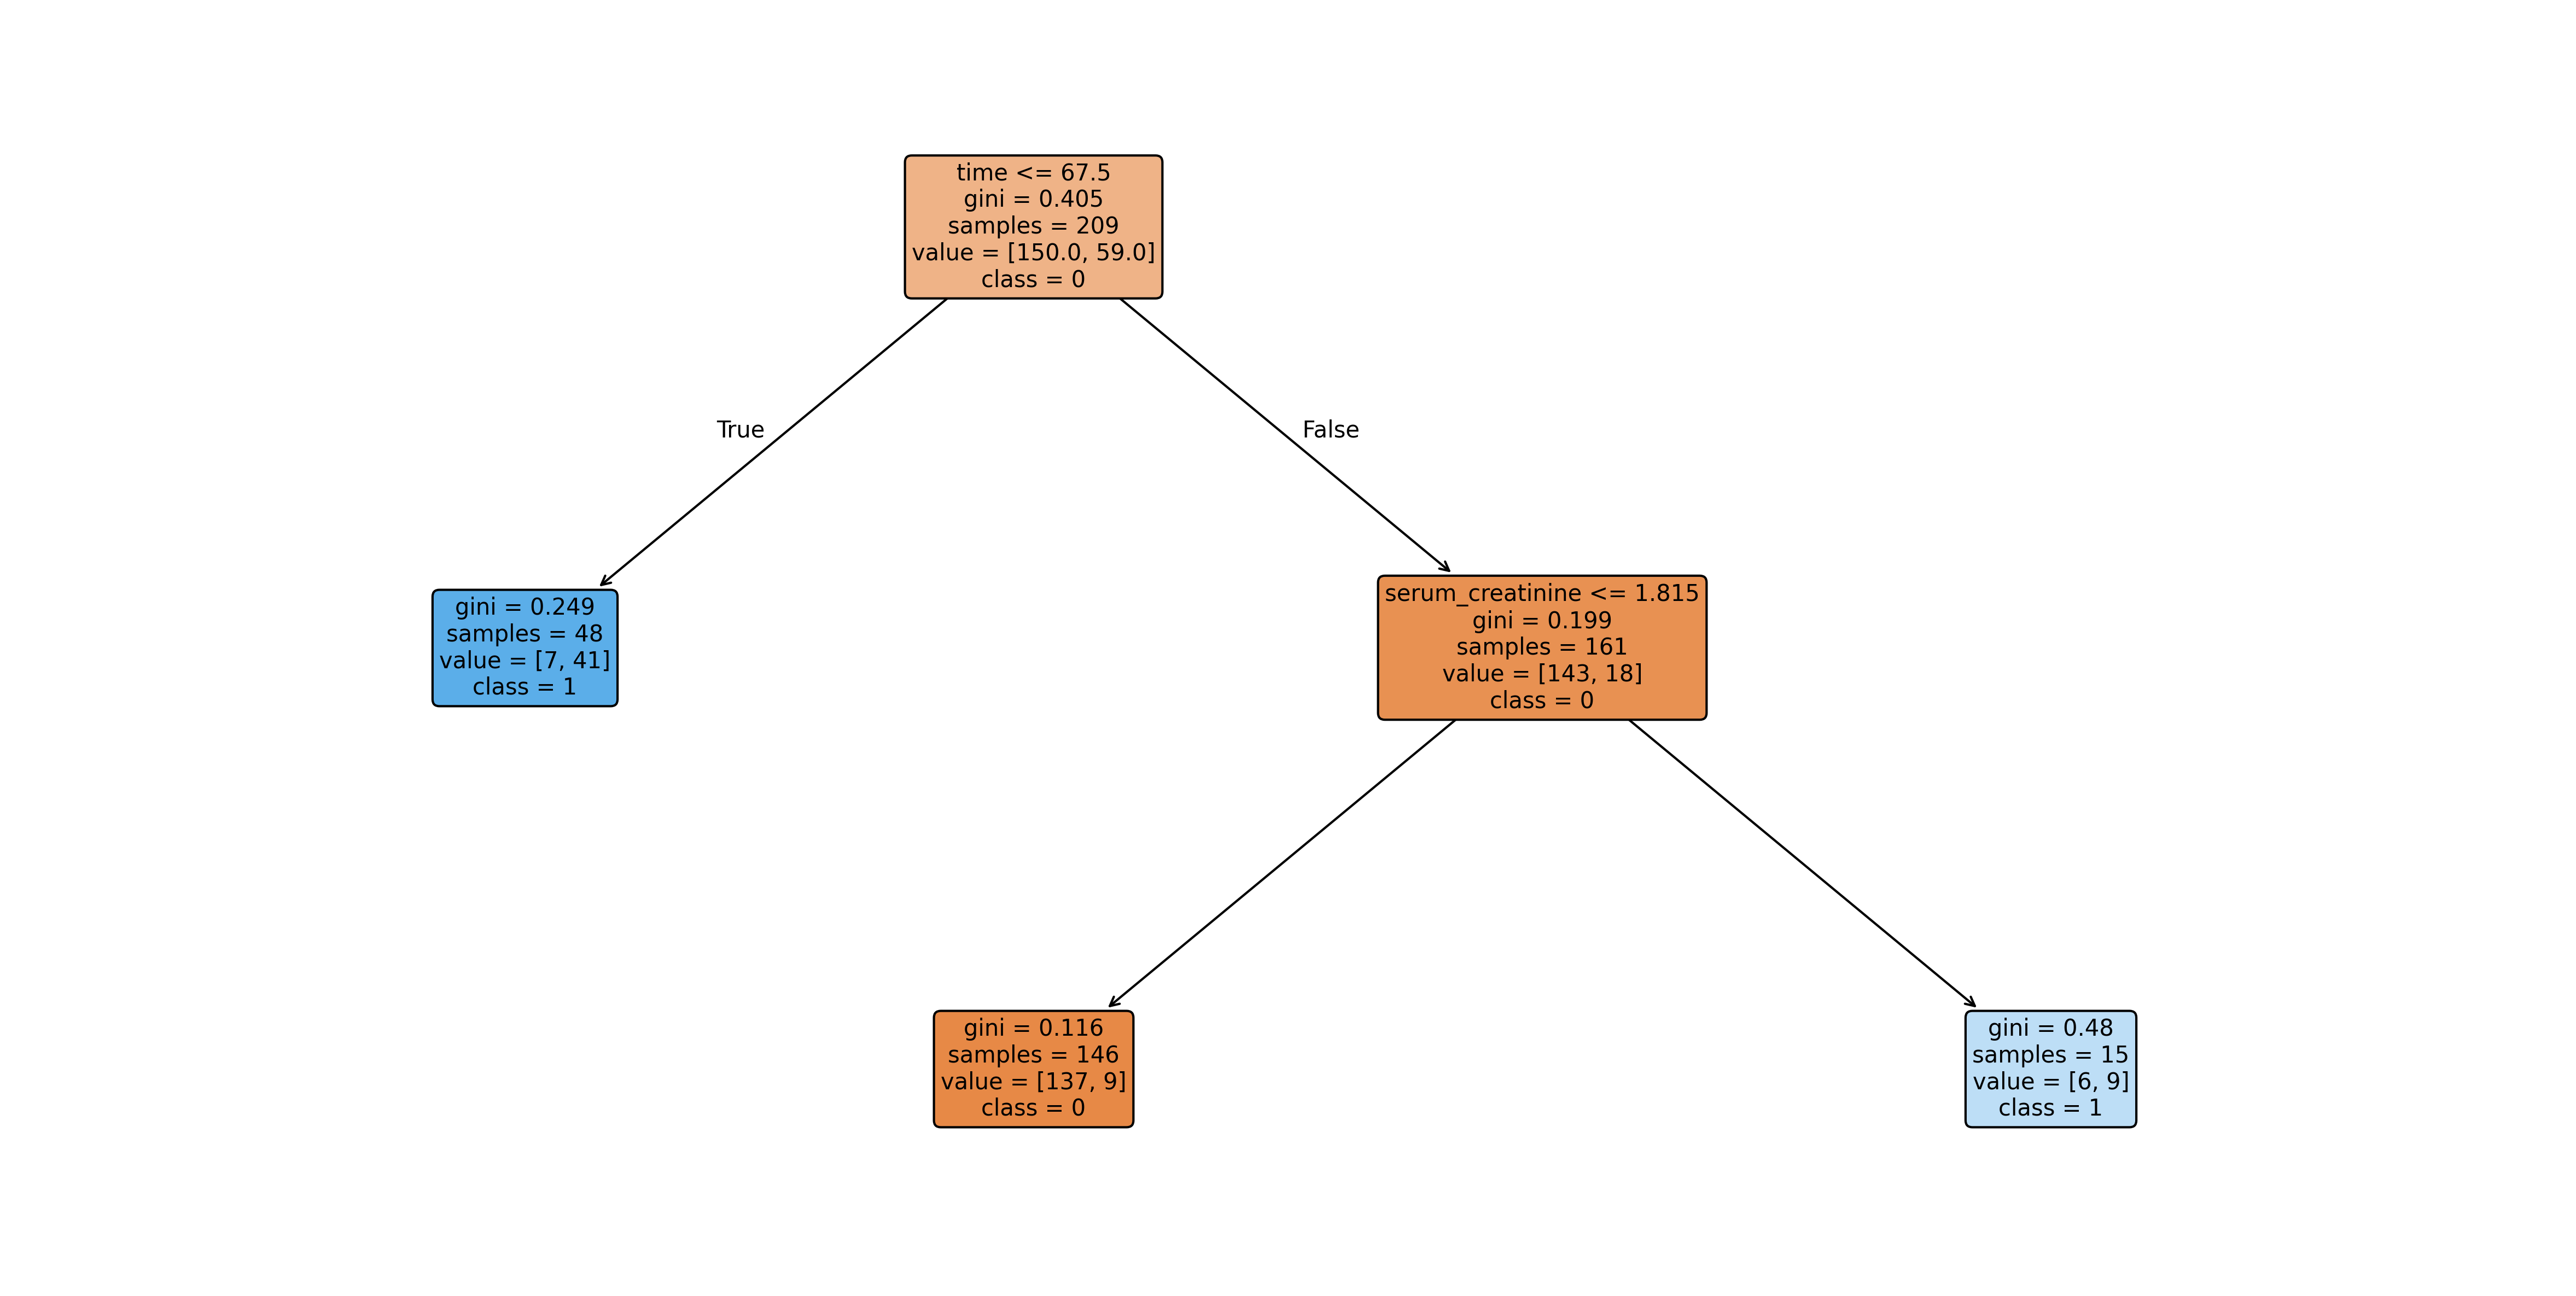

[[137   9]
 [ 13  50]]
[[45 15]
 [ 8 22]]


In [17]:
# Classification using pruned decision Tree
# Import libraries
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# To choose optimal value of ccp_alpha
from sklearn.model_selection import cross_val_score
# Define a range of ccp_alpha values to test
ccp_alphas = np.linspace(0, 0.1, 100)
# Create a list to store the cross-validation scores for each ccp_alpha
scores = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=5, ccp_alpha=ccp_alpha)
    score = cross_val_score(clf, X_train, y_train, cv=10)
    scores.append(score.mean())

# Find the optimal ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmax(scores)]
print("Optimal alpha Value : ",optimal_ccp_alpha)

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, scores)
plt.xlabel('ccp_alpha')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Score vs ccp_alpha')
plt.grid(True)
plt.savefig('Optimal Alpha value', dpi=400)
plt.show()

# Create a Decision Tree classifier object
clf = DecisionTreeClassifier(min_samples_leaf=5,ccp_alpha=optimal_ccp_alpha)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Evaluate on the training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)

# Evaluate on the testing set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)

plt.figure(figsize=(20,10), dpi=300)
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'], 
          fontsize=10, rounded=True, max_depth=2)  # Adjust max_depth for pruning
plt.savefig('Decision tree - pruned', dpi=400)
plt.show()

cm_training = confusion_matrix(y_train_pred, y_train)
print(cm_training)
cm_test = confusion_matrix(y_test_pred,y_test)
print(cm_test)

Training Set Metrics:
Accuracy: 0.9138755980861244
Precision: 0.847457627118644
Recall: 0.847457627118644
F1-Score: 0.847457627118644

Testing Set Metrics:
Accuracy: 0.7666666666666667
Precision: 0.7857142857142857
Recall: 0.5945945945945946
F1-Score: 0.676923076923077


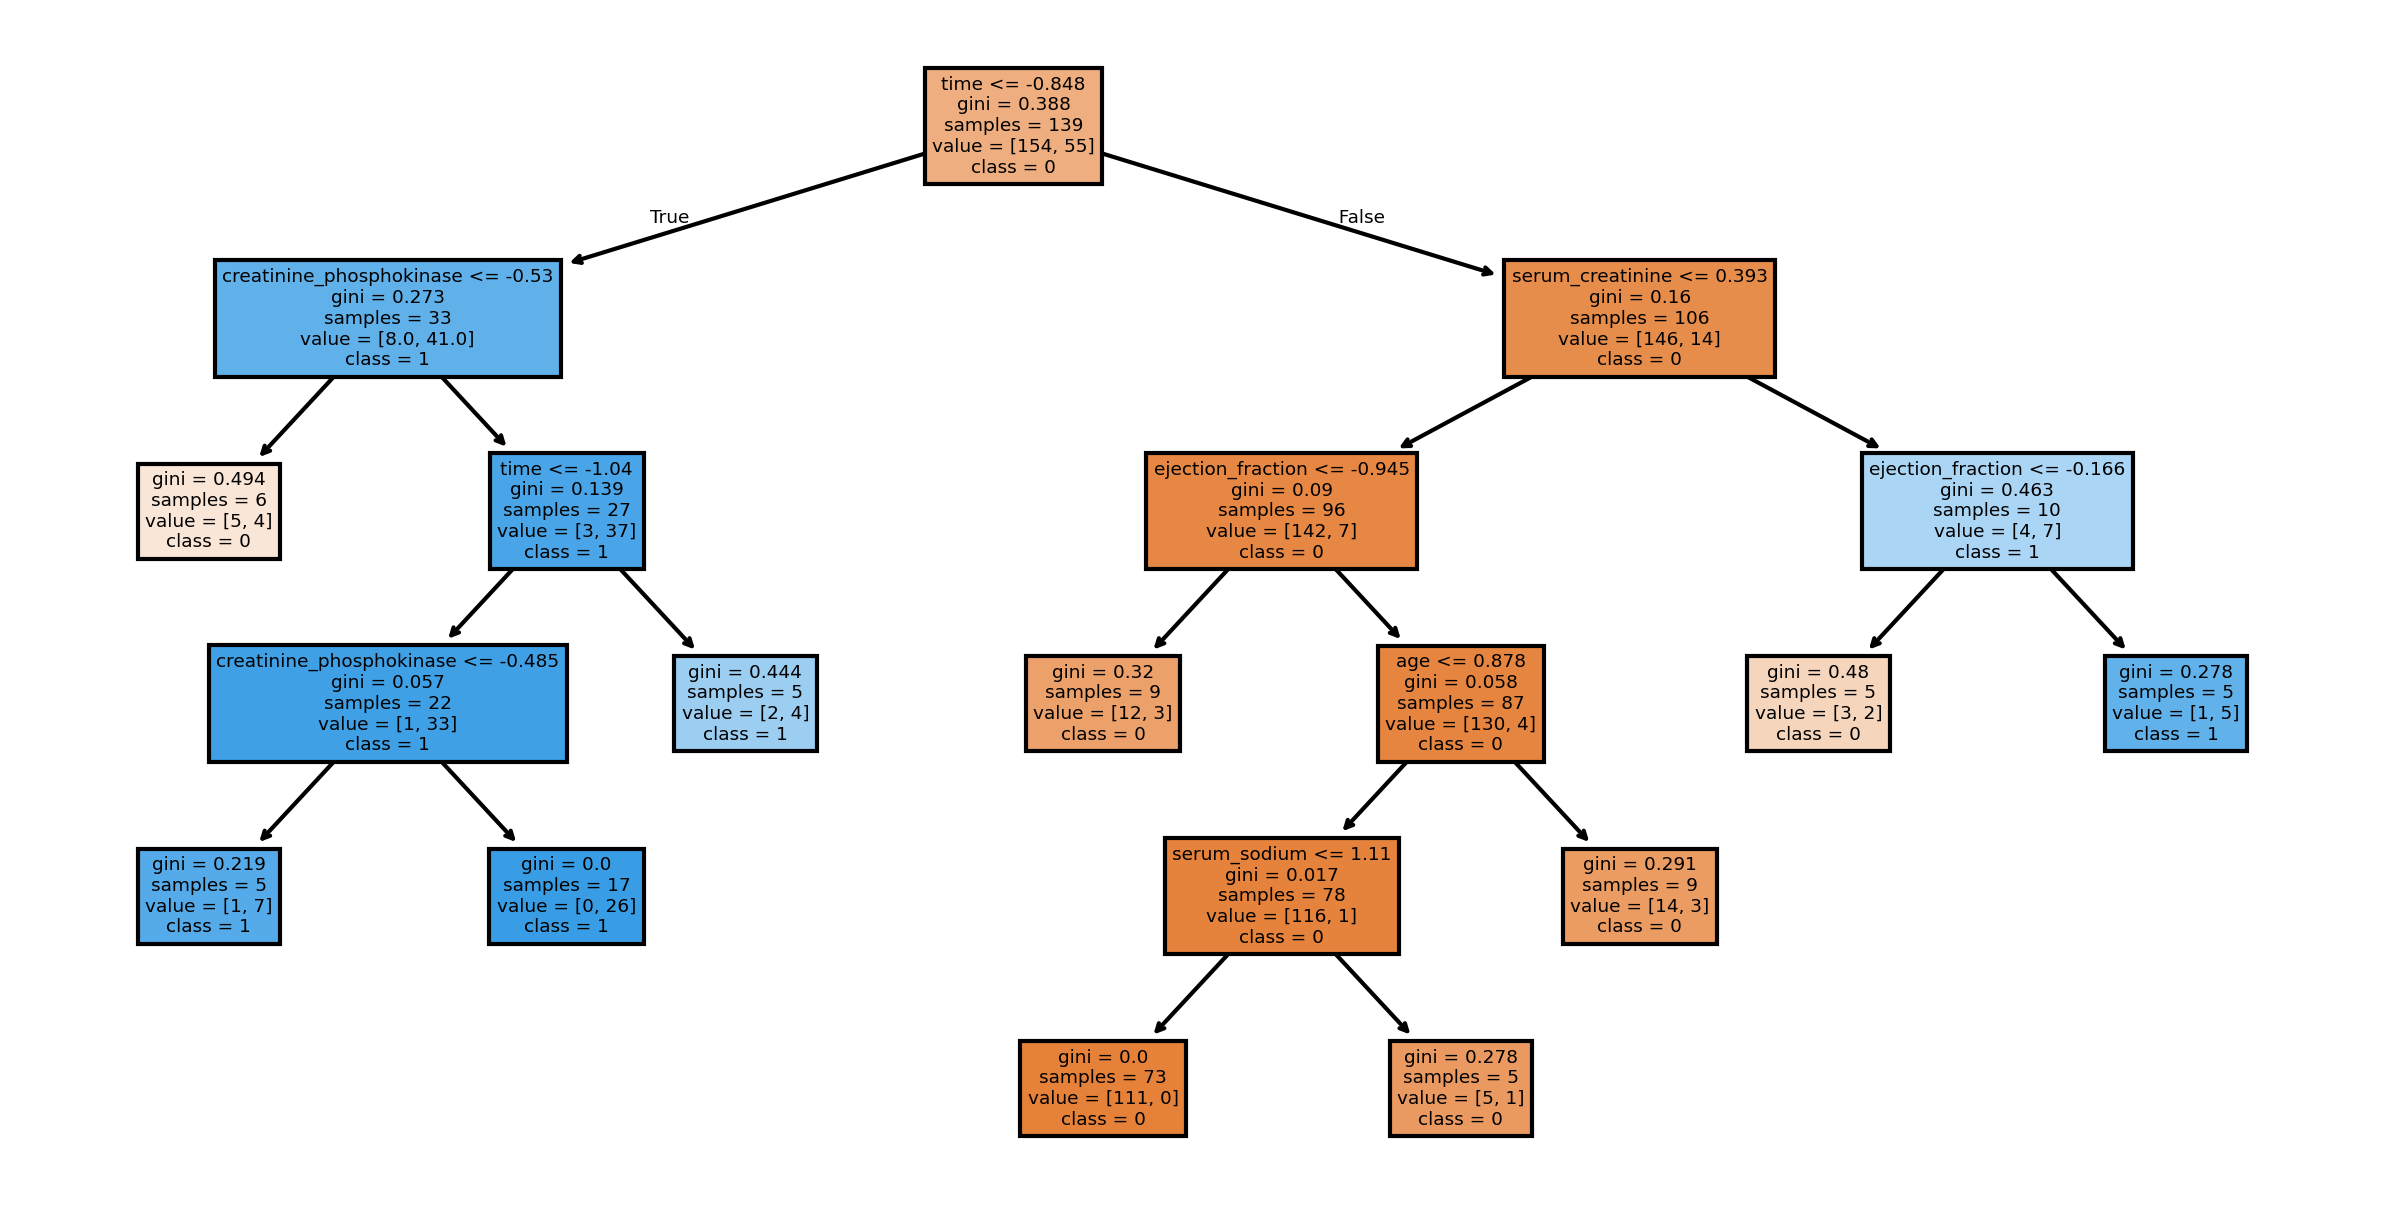

[[141   9]
 [  9  50]]
[[47 15]
 [ 6 22]]


In [14]:
# Classification using Bagging
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the base decision tree classifier
base_estimator = DecisionTreeClassifier(min_samples_leaf=5)

# Create the bagging classifier object with desired parameters
bagging_clf = BaggingClassifier(base_estimator, n_estimators=100)  # n_estimators are basically means the no. of bootstrapped sampeles

# Train the bagging classifier on the training data
bagging_clf.fit(X_train, y_train)

# Evaluate on the training set
y_train_pred = bagging_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)

# Evaluate on the testing set
y_test_pred = bagging_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)

# Visualize a single decision tree from the ensemble
# This might not be feasible for very large n_estimators
estimator_idx = 0  # Choose an index from 0 to n_estimators-1(i.e. we got 100 different decision trees for 100 bootstrapped samples)
plt.figure(figsize=(10,5), dpi=300)
plot_tree(bagging_clf.estimators_[estimator_idx], filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

cm_training = confusion_matrix(y_train_pred, y_train)
print(cm_training)
cm_test = confusion_matrix(y_test_pred,y_test)
print(cm_test)

In [ ]:
# To check the imapact of allowing only a subset of features to perform a particular split

error_rates1 = []  # Initialize an empty list to store error rates
error_rates2 = [] 
error_rates3 = [] 

for num_estimators in range(1, 300):
    rf_clf = RandomForestClassifier(n_estimators=num_estimators, random_state=35, min_samples_leaf=5,max_features=12)
    rf_clf.fit(X_train, y_train)
    y_test_pred = rf_clf.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_test_pred)
    error_rates1.append(error_rate)

for num_estimators in range(1, 300):
    rf_clf = RandomForestClassifier(n_estimators=num_estimators, random_state=35, min_samples_leaf=5,max_features=8)
    rf_clf.fit(X_train, y_train)
    y_test_pred = rf_clf.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_test_pred)
    error_rates2.append(error_rate)

for num_estimators in range(1, 300):
    rf_clf = RandomForestClassifier(n_estimators=num_estimators, random_state=35, min_samples_leaf=5,max_features=3)
    rf_clf.fit(X_train, y_train)
    y_test_pred = rf_clf.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_test_pred)
    error_rates3.append(error_rate)


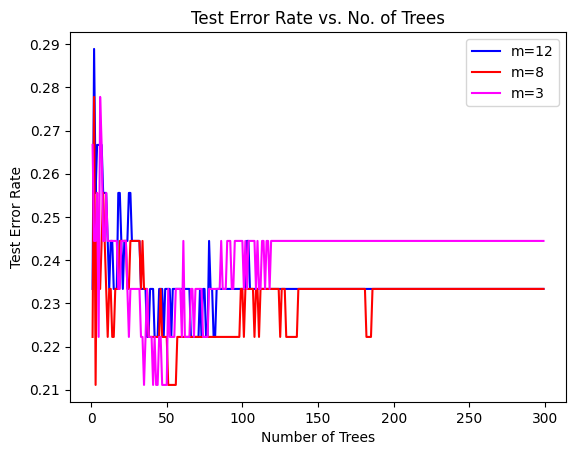

In [32]:
plt.plot(range(1, 300), error_rates1,label="m=12",color='blue')  # Plot number of estimators vs. error rates
plt.plot(range(1, 300), error_rates2,label="m=8",color='red') 
plt.plot(range(1, 300), error_rates3,label="m=3",color='magenta') 
plt.legend()
plt.xlabel("Number of Trees")
plt.ylabel("Test Error Rate")
plt.title("Test Error Rate vs. No. of Trees")
plt.savefig('Regressors Subset Selection', dpi=400)
plt.show()

Training Set Metrics:
Accuracy: 0.9425837320574163
Precision: 0.9272727272727272
Recall: 0.864406779661017
F1-Score: 0.8947368421052632

Testing Set Metrics:
Accuracy: 0.7555555555555555
Precision: 0.8
Recall: 0.5405405405405406
F1-Score: 0.6451612903225806


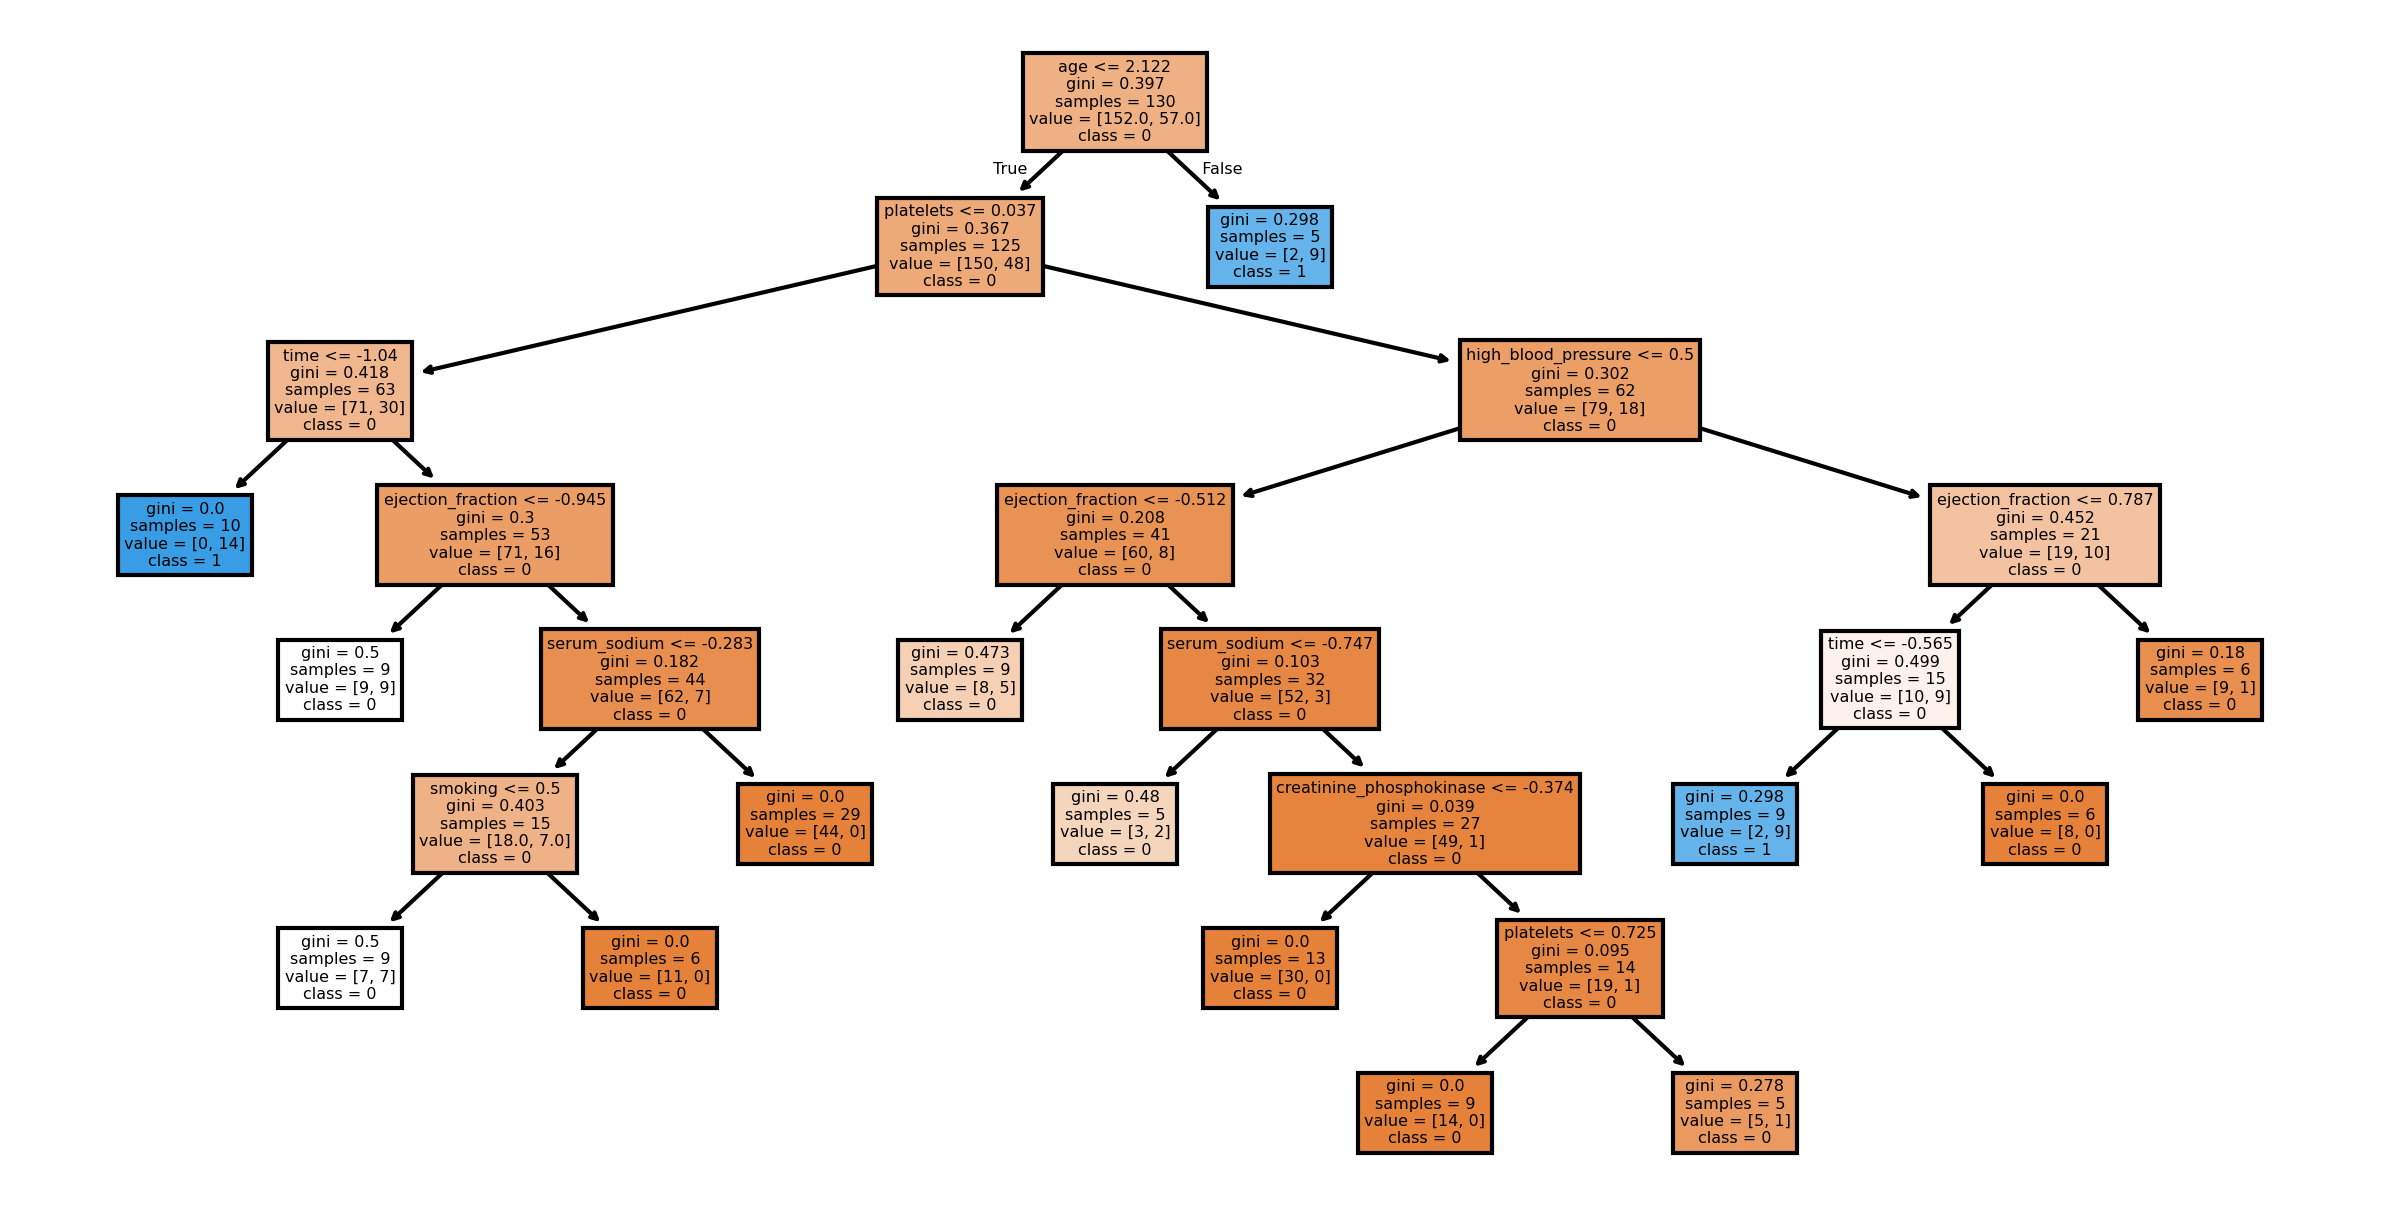

[[146   8]
 [  4  51]]
[[48 17]
 [ 5 20]]


In [15]:
# Classification using The Random forest model
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=35,min_samples_leaf=5)

# Train the Random Forest classifier
rf_clf.fit(X_train, y_train)

# Evaluate on the training set
y_train_pred = rf_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)

# Evaluate on the testing set
y_test_pred =rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)

# Visualize a single decision tree from the ensemble
# This might not be feasible for very large n_estimators
estimator_idx = 0  # Choose an index from 0 to n_estimators-1(i.e. we got 100 different decision trees for 100 bootstrapped samples)
plt.figure(figsize=(10,5), dpi=300)
plot_tree(rf_clf.estimators_[estimator_idx], filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

cm_training = confusion_matrix(y_train_pred, y_train)
print(cm_training)
cm_test = confusion_matrix(y_test_pred,y_test)
print(cm_test)

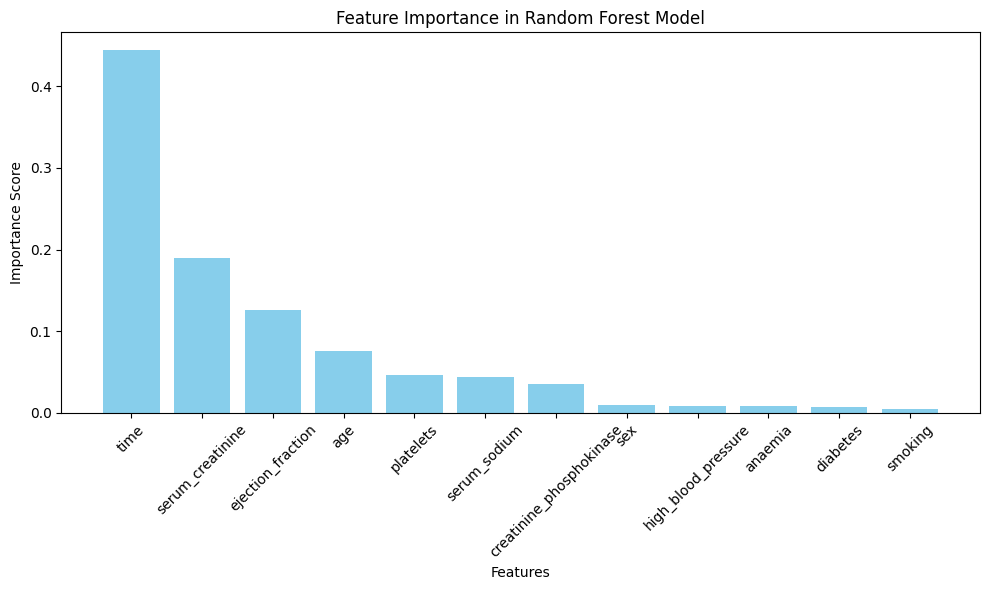

In [8]:
# Import libraries for plotting
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
importances = rf_clf.feature_importances_

# Sort feature importances and feature names by importance (descending)
feature_names = X.columns
sorted_idx = importances.argsort()[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest Model")
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.tight_layout()
plt.savefig('Variable importance measure', dpi=400)
plt.show()

In [16]:
# Classification using SVM
from sklearn.svm import SVC
# Create an SVM classifier with a radial basis function (RBF) kernel
svm_model = SVC(kernel='sigmoid', C=10)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_test_pred = svm_model.predict(X_test)
y_train_pred = svm_model.predict(X_train)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Evaluate using 10-fold CV
scores = cross_val_score(svm_model, X, y, cv=10, scoring='accuracy')
print("10-Fold CV Accuracy:", scores.mean())
print("10-Fold Error rate :", 1-scores.mean())

Training Accuracy: 0.7894736842105263
Test Accuracy: 0.7777777777777778
10-Fold CV Accuracy: 0.5988505747126436
10-Fold Error rate : 0.4011494252873564


In [8]:
# Classification using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda.fit(X_train, y_train)

# Evaluate on the training set
y_train_pred = lda.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)

# Evaluate on the testing set
y_test_pred = lda.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)

# Evaluate using 10-fold CV
scores = cross_val_score(lda, X, y, cv=10, scoring='accuracy')
print("10-Fold CV Accuracy:", scores.mean())
print("10-Fold Error rate :", 1-scores.mean())

Training Set Metrics:
Accuracy: 0.8803827751196173
Precision: 0.8035714285714286
Recall: 0.7627118644067796
F1-Score: 0.782608695652174

Testing Set Metrics:
Accuracy: 0.8111111111111111
Precision: 0.8846153846153846
Recall: 0.6216216216216216
F1-Score: 0.7301587301587301
10-Fold CV Accuracy: 0.8089655172413792
10-Fold Error rate : 0.19103448275862078


In [17]:
# Classification Using QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Create a QDA model
qda = QuadraticDiscriminantAnalysis()

# Fit the model to the training data
qda.fit(X_train, y_train)

# Evaluate on the training set
y_train_pred = qda.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)

# Evaluate on the testing set
y_test_pred = qda.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)

# Evaluate using 10-fold CV
scores = cross_val_score(qda, X, y, cv=10, scoring='accuracy')
print("10-Fold CV Accuracy:", scores.mean())
print("10-Fold Error rate :", 1-scores.mean())

Training Set Metrics:
Accuracy: 0.8516746411483254
Precision: 0.78
Recall: 0.6610169491525424
F1-Score: 0.7155963302752294

Testing Set Metrics:
Accuracy: 0.7
Precision: 0.75
Recall: 0.40540540540540543
F1-Score: 0.5263157894736842
10-Fold CV Accuracy: 0.7524137931034484
10-Fold Error rate : 0.24758620689655164


In [18]:
# Classification using Naive's Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Evaluate on the training set
y_train_pred = nb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)

# Evaluate on the testing set
y_test_pred = nb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)

# Evaluate using 10-fold CV
scores = cross_val_score(nb, X, y, cv=10, scoring='accuracy')
print("10-Fold CV Accuracy:", scores.mean())
print("10-Fold Error rate :", 1-scores.mean())

Training Set Metrics:
Accuracy: 0.8181818181818182
Precision: 0.7441860465116279
Recall: 0.5423728813559322
F1-Score: 0.6274509803921569

Testing Set Metrics:
Accuracy: 0.7111111111111111
Precision: 0.7894736842105263
Recall: 0.40540540540540543
F1-Score: 0.5357142857142857
10-Fold CV Accuracy: 0.785632183908046
10-Fold Error rate : 0.214367816091954


In [23]:
# To check the assumption of independence
from scipy.stats import chi2_contingency, f_oneway, pearsonr
from itertools import combinations
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train and y_train are available and X_train has original column names

# Step 1: Define the dataset
X = pd.DataFrame(X_train, columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 
                                   'ejection_fraction', 'high_blood_pressure', 'platelets', 
                                   'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])
y = y_train

# Explicitly specify categorical and continuous features
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
continuous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 
                       'serum_creatinine', 'serum_sodium', 'time']

print("Categorical Features:", categorical_features)
print("Continuous Features:", continuous_features)

# Step 2: Check independence for categorical-categorical features (Chi-Square Test)
print("\n*Chi-Square Test for Categorical Features*")
for feature1, feature2 in combinations(categorical_features, 2):
    contingency_table = pd.crosstab(X[feature1], X[feature2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {feature1} and {feature2}: p-value = {p:.5f}")
    if p < 0.05:
        print(" -> Variables are NOT independent.")
    else:
        print(" -> Variables are independent.")

# Step 3: Check independence for continuous-continuous features (Pearson Correlation)
print("\n*Pearson Correlation for Continuous Features*")
for feature1, feature2 in combinations(continuous_features, 2):
    corr, p = pearsonr(X[feature1], X[feature2])
    print(f"Pearson Correlation between {feature1} and {feature2}: correlation = {corr:.2f}, p-value = {p:.5f}")
    if p < 0.05:
        print(" -> Variables are NOT independent.")
    else:
        print(" -> Variables are independent.")

# Step 4: Check independence for categorical-continuous features (ANOVA F-test)
print("\n*ANOVA F-test for Categorical and Continuous Features*")
for cat_feature in categorical_features:
    for cont_feature in continuous_features:
        groups = [X[cont_feature][X[cat_feature] == category] for category in X[cat_feature].unique()]
        f_stat, p = f_oneway(*groups)
        print(f"ANOVA F-test between {cat_feature} and {cont_feature}: p-value = {p:.5f}")
        if p < 0.05:
            print(" -> Variables are NOT independent.")
        else:
            print(" -> Variables are independent.")

# Step 5: Naive Bayes Classification
print("\n*Naive Bayes Classification*")
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate on training data
y_train_pred = nb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on testing data
y_test_pred = nb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

# 10-Fold Cross-Validation
scores = cross_val_score(nb, X, y, cv=10, scoring='accuracy')
print("10-Fold CV Accuracy:", scores.mean())
print("10-Fold Error rate:", 1 - scores.mean())

Categorical Features: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
Continuous Features: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

*Chi-Square Test for Categorical Features*
Chi-Square Test between anaemia and diabetes: p-value = 0.67857
 -> Variables are independent.
Chi-Square Test between anaemia and high_blood_pressure: p-value = 0.32754
 -> Variables are independent.
Chi-Square Test between anaemia and sex: p-value = 0.03978
 -> Variables are NOT independent.
Chi-Square Test between anaemia and smoking: p-value = 0.01427
 -> Variables are NOT independent.
Chi-Square Test between diabetes and high_blood_pressure: p-value = 0.79304
 -> Variables are independent.
Chi-Square Test between diabetes and sex: p-value = 0.02027
 -> Variables are NOT independent.
Chi-Square Test between diabetes and smoking: p-value = 0.02054
 -> Variables are NOT independent.
Chi-Square Test between high_blood_press

In [19]:
#K-Fold Cross validation to select a particular value of K
error_rate1 = []
error_rate2 = []
error_rate3 = []
error_rate4 = []
error_rate5 = []
error_rate6 = []
error_rate7 = []
error_rate8 = []
for i in range(2, 20):
    score1 = cross_val_score(model, X, y, cv=i, scoring='accuracy')
    error_rate1.append(1 - score1.mean())  ##error= 1 - accuracy
    
    score2 = cross_val_score(clf, X, y, cv=i, scoring='accuracy')
    error_rate2.append(1 - score2.mean())  
    
    score3 = cross_val_score(bagging_clf, X, y, cv=i, scoring='accuracy')
    error_rate3.append(1 - score3.mean())
    
    score4 = cross_val_score(rf_clf, X, y, cv=i, scoring='accuracy')
    error_rate4.append(1 - score4.mean())
    
    score5 = cross_val_score(svm_model, X, y, cv=i, scoring='accuracy')
    error_rate5.append(1 - score5.mean())

    score6 = cross_val_score(lda, X, y, cv=i, scoring='accuracy')
    error_rate6.append(1 - score6.mean())

    score7 = cross_val_score(qda, X, y, cv=i, scoring='accuracy')
    error_rate7.append(1 - score7.mean())

    score8 = cross_val_score(nb, X, y, cv=i, scoring='accuracy')
    error_rate8.append(1 - score8.mean())

C:\Users\waghs\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\waghs\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

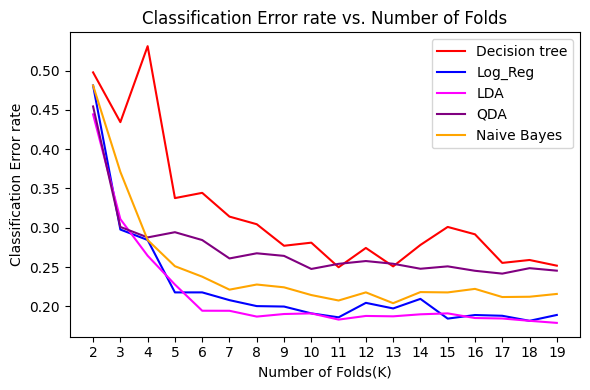

In [20]:
## Plot the graph
plt.figure(figsize=(6, 4),dpi=100)  # Adjust figure size
plt.plot(range(2, 20), error_rate2, color='red',label='Decision tree')
#plt.plot(range(2, 20), error_rate3, color='green',label='bagging')
#plt.plot(range(2, 20), error_rate4, color='black',label='random forest')
plt.plot(range(2, 20), error_rate1, color='blue',label='Log_Reg')
#plt.plot(range(2, 20), error_rate5, color='yellow',label='SVM')
plt.plot(range(2, 20), error_rate6, color='magenta',label='LDA')
plt.plot(range(2, 20), error_rate7, color='purple',label='QDA')
plt.plot(range(2, 20), error_rate8, color='orange',label='Naive Bayes')
plt.legend()
plt.xticks(range(2, 20))  # Set integer x-axis ticks
plt.xlabel("Number of Folds(K)")
plt.ylabel("Classification Error rate")
plt.title("Classification Error rate vs. Number of Folds")
plt.tight_layout()
#plt.grid(True)
plt.savefig('Optimal K', dpi=400)
plt.show()